In [1]:
import pandas as pd
import scanpy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
adata = sc.read_h5ad("seurat_withscreen/data_integrated_SCT_50PCs_all_screencells.h5ad")

/links/groups/treutlein/USERS/jjans/mambaforge/envs/py_jjans_3.10_ML/lib/python3.10/site-packages/anndata/compat/__init__.py:298: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


In [3]:
meta = adata.obs.copy()
meta.head()

,orig.ident,nCount_RNA,nFeature_RNA,sample,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,total_counts_mt,...,TF_HOXB3,pred_label,final_label,experiment,percent.mt,nCount_SCT,nFeature_SCT,unintegrated_clusters,seurat_clusters,SCT_snn_res.1
43_96_51__s3,0,4524.0,2354.0,iGlut_post_p2,2593,7.860956,4922.0,8.501674,14.181227,79.0,...,0.0,unknown,unknown,screen,0.066313,5597.0,2356,38,16,16
34_73_51__s2,0,4917.0,2195.0,iGlut_post_p2,2423,7.793174,5345.0,8.584104,12.965388,1.0,...,0.0,unknown,unknown,screen,0.000000,5735.0,2195,3,14,14
66_08_31__s3,0,6423.0,2782.0,iGlut_post_p2,3063,8.027477,6913.0,8.841304,12.006365,62.0,...,0.0,unknown,unknown,screen,0.062276,6408.0,2781,38,16,16
70_40_74__s1,0,6811.0,2811.0,iGlut_post_p1,3046,8.021913,7276.0,8.892474,12.039582,54.0,...,0.0,unknown,unknown,screen,0.073411,6654.0,2811,5,5,5
08_12_14__s2,0,4843.0,2157.0,iGlut_post_p2,2371,7.771489,5273.0,8.570544,12.194197,1.0,...,0.0,unknown,unknown,screen,0.000000,5700.0,2156,7,4,4


In [4]:
meta_oe_xgb = pd.read_csv("classifier_results/XGB_classifier_extraEGFP_0.85_precision.tsv",sep="\t",index_col=0)

In [5]:
common_cells = list(set(meta.index)&set(meta_oe_xgb.index))

In [6]:
meta.loc[common_cells,'final_label'] = meta_oe_xgb.loc[common_cells,'final_label']

In [7]:
meta_screen = meta.loc[meta['experiment']=='screen']

In [8]:
meta_screen.columns

Index(['orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample',
       'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts',
       'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt',
       'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo',
       'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'percent_mito',
       'n_counts', 'outlier', 'mt_outlier', 'doublet_score',
       'predicted_doublet', 'M_XAV', 'M_CHIR', 'M_RA', 'M_FGF8', 'M_BMP4',
       'M_SHH', 'M_CycA', 'FB_NFATC1', 'FB_LEF1', 'FB_LHX4', 'FB_NEUROD1',
       'FB_PHOX2B', 'FB_LHX9', 'FB_MSX1', 'FB_ZFHX3', 'FB_TLX2', 'FB_TCF7L2',
       'FB_TCF7L1', 'FB_EGFP', 'FB_SMAD9', 'FB_RXRG', 'FB_RARB', 'FB_NFIA',
       'FB_MEIS2', 'FB_HOXB3', 'TF_NFATC1', 'TF_LEF1', 'TF_LHX4', 'TF_NEUROD1',
       'TF_PHOX2B', 'TF_LHX9', 'TF_MSX1', 'TF_ZFHX3', 'TF_TLX2', 'TF_TCF7L2',
       'TF_TCF7L1', 'TF_EGFP', 'TF_SMAD9', 'TF_RXRG', 'TF_RARB', 'TF_NFIA',
       'TF_MEIS2', 'TF_HOXB3', 'pred_labe

In [9]:
sample = 'iGlut_post'
print(sample)

#reference_adata = sc.read_h5ad("/home/jjanssens/jjans/analysis/iNeuron_morphogens/final/scanpy/"+sample+"_dr_clustered_raw_merged.h5ad")
#load metadata
ref_meta = pd.read_csv("/home/jjanssens/jjans/analysis/iNeuron_morphogens/final/scanpy/"+sample+"_dr_clustered_raw_merged_meta.tsv",sep="\t",index_col=0)
ref_meta['M_CycA'] = ref_meta['CycA']


iGlut_post


In [10]:
ref_meta['condition'] = ref_meta['AP_axis']+"_"+ref_meta['DV_axis']+"_"+ref_meta['Basal_media']

In [11]:
screen_cells = list(set(ref_meta.index)&set(meta.index))

In [12]:
meta.loc[screen_cells,'final_label'] = ref_meta.loc[screen_cells,'condition']

In [41]:
cond_summary = pd.DataFrame(index=list(set(meta['seurat_clusters'])),columns=list(set(meta['final_label'])))
for condition in list(set(meta['final_label'])):
    meta_cond = meta.loc[meta['final_label']==condition]
    a = meta_cond['seurat_clusters'].value_counts()
    a = a[a>=5]
    cond_summary.loc[a.index,condition] = a


In [42]:
cond_summary = cond_summary.fillna(0)

In [43]:
labels_use = ['TLX2','MSX1','TCF7L1','TCF7L2','NEUROD1','NFATC1','LHX9','LEF1','PHOX2B','EGFP']
labels_use = ['label_'+x for x in labels_use]

In [44]:
cond_summary_oe = cond_summary[labels_use].copy()
cond_summary_screen = cond_summary[list(set(ref_meta['condition']))].copy()

In [45]:
cond_summary_screen_norm = cond_summary_screen/cond_summary_screen.sum()
cond_summary_oe_norm = cond_summary_oe/cond_summary_oe.sum()

In [46]:
tst = pd.DataFrame(index=cond_summary.columns)
tst.loc[cond_summary_oe_norm.columns,'purity_max'] = cond_summary_oe_norm.max()
tst.loc[cond_summary_screen_norm.columns,'purity_max'] = cond_summary_screen_norm.max()
tst.loc[cond_summary_oe_norm.columns,'exp'] = 'TF-OE'
tst.loc[cond_summary_screen_norm.columns,'exp'] = 'morph'
tst.loc['label_EGFP','exp'] = 'TF-OE_ctrl'
tst.loc['ctrl_ctrl_mTeSR','exp'] = 'morph_ctrl'

tst.loc[cond_summary_oe_norm.columns,'exp2'] = 'TF-OE'
tst.loc[cond_summary_screen_norm.columns,'exp2'] = 'morph'


/tmp/ipykernel_21984/1740182696.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'TF-OE' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  tst.loc[cond_summary_oe_norm.columns,'exp'] = 'TF-OE'
/tmp/ipykernel_21984/1740182696.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'TF-OE' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  tst.loc[cond_summary_oe_norm.columns,'exp2'] = 'TF-OE'


/links/groups/treutlein/USERS/jjans/mambaforge/envs/py_jjans_3.10_ML/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/links/groups/treutlein/USERS/jjans/mambaforge/envs/py_jjans_3.10_ML/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/links/groups/treutlein/USERS/jjans/mambaforge/envs/py_jjans_3.10_ML/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 22.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


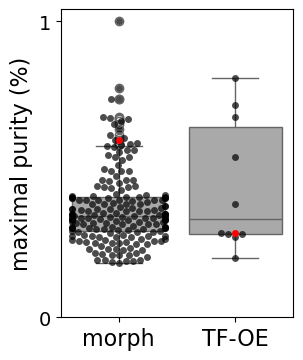

In [54]:
# Usual boxplot
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

plt.figure(figsize=(3,4))
ax = sns.boxplot(x='exp2',y='purity_max',data=tst,color='darkgrey')
 
# Add jitter with the swarmplot function
ax = sns.swarmplot(x='exp2', y='purity_max', data=tst, color="k",alpha=0.7)

tst2 = tst.loc[tst['exp'].isin(['TF-OE_ctrl','morph_ctrl'])]
ax = sns.swarmplot(x='exp2', y='purity_max', data=tst2, color="red")
plt.ylabel('maximal purity (%)',fontsize=16)
plt.xlabel('')
plt.xticks(fontsize=16)
plt.yticks([0,1],[0,1],fontsize=14)
plt.savefig("figures/seurat_integration_purity_seuratclusters_final_label.png",dpi=350,bbox_inches='tight',pad_inches=0)
plt.savefig("figures/seurat_integration_purity_seuratclusters_final_label.pdf",dpi=350,bbox_inches='tight',pad_inches=0)
plt.show()


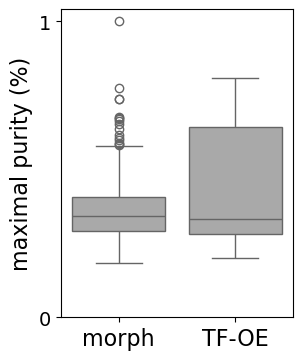

In [55]:
# Usual boxplot
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

plt.figure(figsize=(3,4))
ax = sns.boxplot(x='exp2',y='purity_max',data=tst,color='darkgrey')
 
# Add jitter with the swarmplot function
#ax = sns.swarmplot(x='exp2', y='purity_max', data=tst, color="k",alpha=0.7)

#tst2 = tst.loc[tst['exp'].isin(['TF-OE_ctrl','morph_ctrl'])]
#ax = sns.swarmplot(x='exp2', y='purity_max', data=tst2, color="red")
plt.ylabel('maximal purity (%)',fontsize=16)
plt.xlabel('')
plt.xticks(fontsize=16)
plt.yticks([0,1],[0,1],fontsize=14)
plt.savefig("figures/seurat_integration_purity_seuratclusters_final_label_nodots.png",dpi=350,bbox_inches='tight',pad_inches=0)
plt.savefig("figures/seurat_integration_purity_seuratclusters_final_label_nodots.pdf",dpi=350,bbox_inches='tight',pad_inches=0)
plt.show()


/links/groups/treutlein/USERS/jjans/mambaforge/envs/py_jjans_3.10_ML/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 5.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


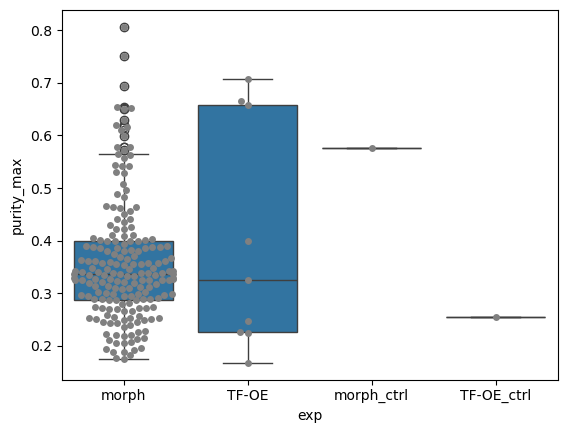

In [19]:
# Usual boxplot
ax = sns.boxplot(x='exp',y='purity_max',data=tst)
 
# Add jitter with the swarmplot function
ax = sns.swarmplot(x='exp', y='purity_max', data=tst, color="grey")
plt.show()


In [21]:
cond_summary_oe.sum()

label_TLX2       631
label_MSX1       358
label_TCF7L1     218
label_TCF7L2     194
label_NEUROD1    163
label_NFATC1     155
label_LHX9       130
label_LEF1       107
label_PHOX2B      50
label_EGFP       247
dtype: int64

In [47]:
tst['exp'].value_counts()

exp
morph         191
TF-OE           9
TF-OE_ctrl      1
morph_ctrl      1
Name: count, dtype: int64